# # of apis vs. performance

In [25]:
apigen_data = {
    '# of apis': [10, 10, 10, 50, 50, 50, 100, 100, 100, 200, 500],
    '# of queries': [13, 5, 12, 102, 153, 93, 243, 411, 472, 726, 2456],
    'Retrieval recall (k=10)': [1.0, 1.0, 1.0, 0.96, 0.96, 0.97, 0.95, 0.97, 0.98, 0.95, 0.93],
    'Tool call recall': [1.0, 1.0, 0.94, 0.92, 0.93, 0.96, 0.91, 0.96, 0.97, 0.93, 0.87],
    'Tool call accuracy': [0.94, 0.92, 0.94, 0.80, 0.89, 0.70, 0.78, 0.85, 0.90, 0.82, 0.79],
    'Pass rate': [1.0, 0.8, 0.8, 0.79, 0.86, 0.76, 0.80, 0.85, 0.86, 0.86, 0.85]
}

In [23]:
# Create the DataFrame from the LaTeX table data
toolbench_data = {
    '# of apis': [10, 10, 10, 50, 50, 50, 100, 100, 100, 200, 500],
    '# of queries': [32, 48, 12, 310, 275, 252, 540, 485, 547, 865, 2019],
    'Retrieval recall (k=10)': [1.0, 1.0, 1.0, 0.99, 0.99, 0.88, 0.99, 0.94, 0.92, 0.91, 0.85],
    'Tool call recall': [0.8, 0.64, 0.42, 0.68, 0.47, 0.53, 0.64, 0.43, 0.63, 0.63, 0.59],
    'Tool call accuracy': [0.68, 0.23, 0.1, 0.32, 0.28, 0.33, 0.44, 0.31, 0.41, 0.43, 0.44],
    'Pass rate': [0.72, 0.81, 0.5, 0.87, 0.8, 0.68, 0.86, 0.8, 0.81, 0.73, 0.76]
}

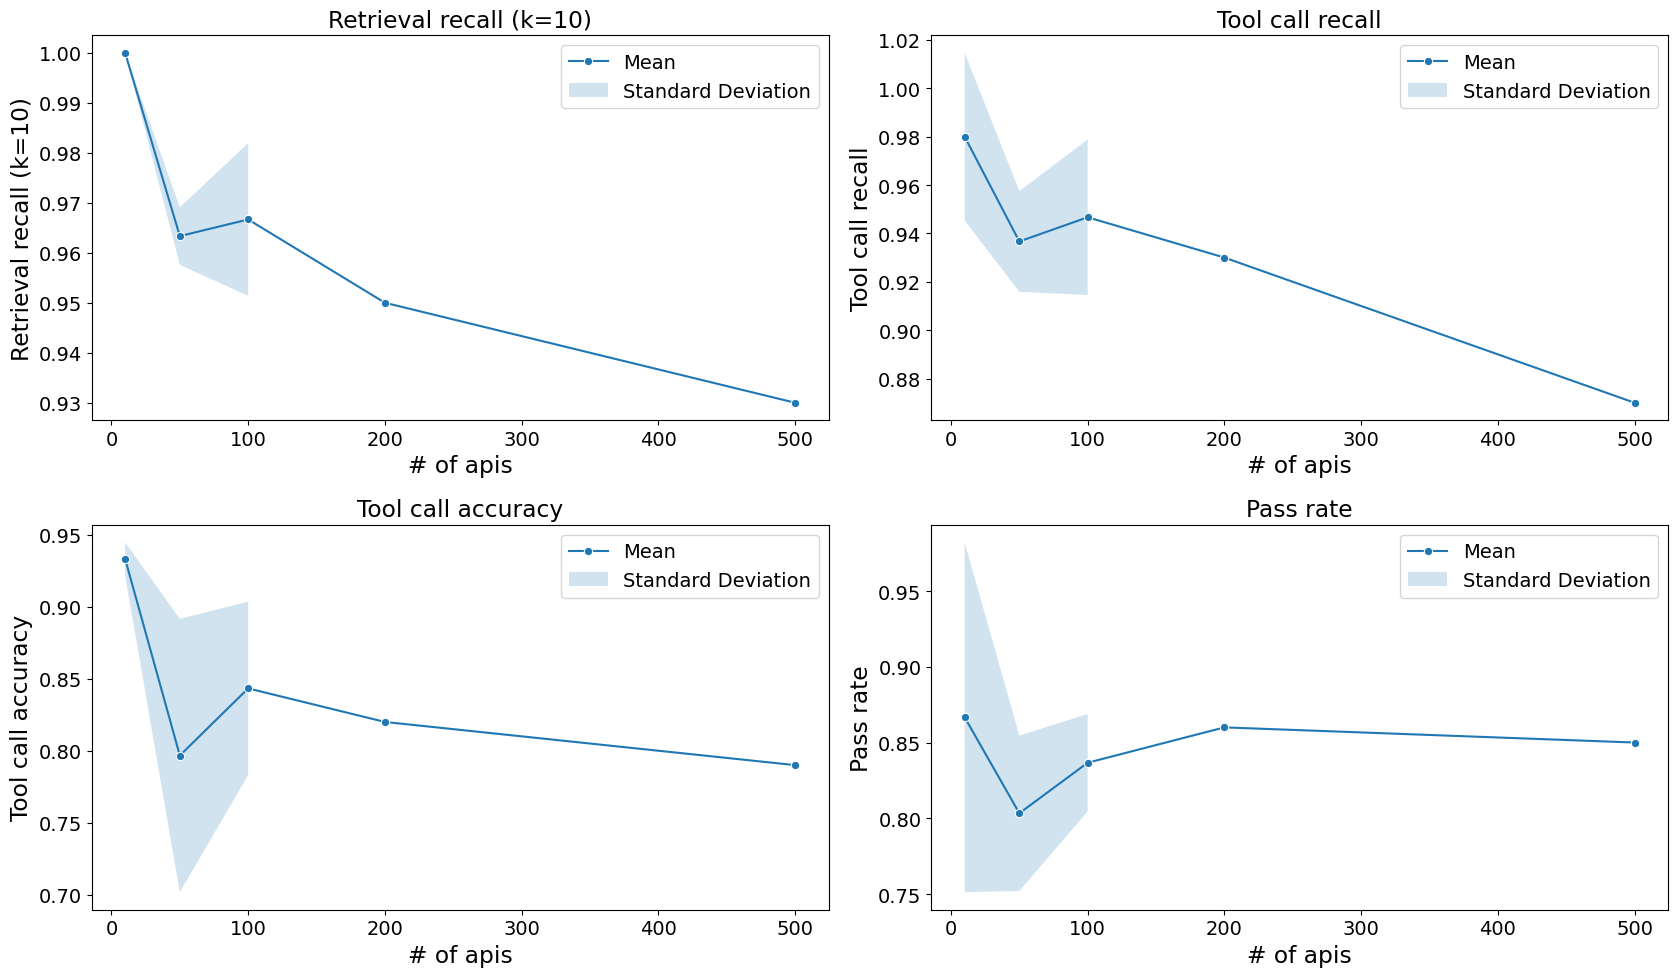

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = apigen_data
df = pd.DataFrame(data)

# Group by '# of apis' and calculate the mean and standard deviation
df_grouped = df.groupby('# of apis').agg(['mean', 'std']).reset_index()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

# font size
plt.rcParams.update({'font.size': 14})
# x-axis, y-axis label size
plt.rcParams.update({'axes.labelsize': 'large'})

# Define the metrics to plot
metrics = ['Retrieval recall (k=10)', 'Tool call recall', 'Tool call accuracy', 'Pass rate']

# Iterate over the metrics and create the plots
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    # Plot the mean
    sns.lineplot(data=df_grouped, x='# of apis', y=(metric, 'mean'), marker='o', ax=ax, label='Mean')
    
    # Fill the area between mean - std and mean + std
    ax.fill_between(df_grouped['# of apis'], df_grouped[(metric, 'mean')] - df_grouped[(metric, 'std')],
                    df_grouped[(metric, 'mean')] + df_grouped[(metric, 'std')], alpha=0.2, label='Standard Deviation')
    
    # Set the title and labels
    ax.set_title(f'{metric}')
    ax.set_xlabel('# of apis')
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()


# steps ratio

([<matplotlib.axis.XTick at 0x10833f990>,
 [Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5')])

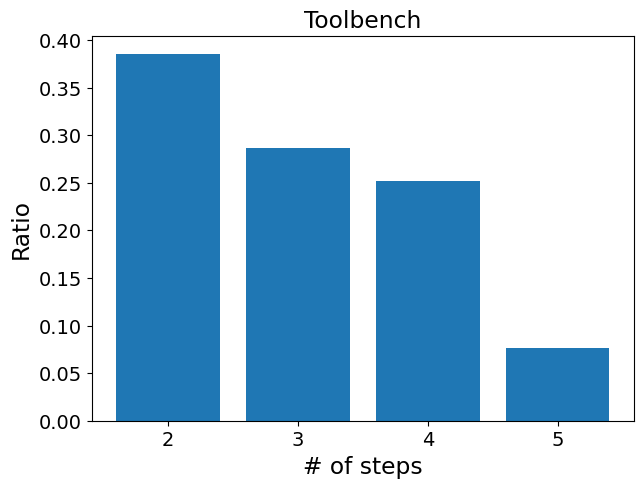

In [22]:
# draw histogram of ratio
apigen_data = {2: 16638, 3: 2846, 4: 786, 5: 96, 6: 58, 7: 9, 8: 7, 9: 4, 10: 2, 14: 1, 20: 1}
toolbench_data = {2: 13119, 3: 9742, 4: 8594, 5: 2600}

data = toolbench_data
df = pd.DataFrame(data.items(), columns=['# of steps', 'count'])
df = df.sort_values(by='# of steps')
df['ratio'] = df['count'] / df['count'].sum()

plt.figure(figsize=(7, 5))
plt.bar(df['# of steps'], df['ratio'])
plt.xlabel('# of steps')
plt.ylabel('Ratio')
plt.title('Toolbench')

# x-ticks
plt.xticks(df['# of steps'])